Target 4.5

In [16]:
import pandas as pd;
import numpy as np;

#read the file and remove countries with less than 3 values.
df_45 = pd.read_excel("Target4.5.xlsx", sheet_name="Data").copy();
df_45 = df_45[df_45['Series Name'] == 'School enrollment, primary (gross), gender parity index (GPI)'];
temp = df_45.isnull().sum(axis=1);
row_to_delete = temp[temp > 15].index;
df_45_data = df_45.drop(labels=row_to_delete);

df_meta = pd.read_excel("Target4.5.xlsx", sheet_name="Country - Metadata")[['Code', "Income Group"]].copy();
df_meta["Income Group"] = df_meta["Income Group"].fillna("Unknown income");
#print(df_meta);
df_meta.rename(columns={"Code":"Country Code"}, inplace=True);
df_45_new = pd.merge(df_45_data, df_meta, how="left", on="Country Code");
#print(df_45_new);

Impute Method: 

1.Constant value (median)

In [17]:
#manipulate the dataframe before imputation
temp = df_45_new.copy();
countryNames = temp['Country Code'].values.tolist();

temp = temp.drop(['Series Name', 'Series Code', 'Country Name', 'Country Code'], axis=1);

temp_T = temp.T;
temp_T.columns = countryNames;
temp_T.index = list(range(2004,2023));
temp_T.rename(index={2022:"Income Group"}, inplace=True);
#print(temp_T);

In [18]:
#method to calculate median
temp_median = temp_T.copy();

for x in temp_median.columns:
  #remove the last row temporary
  res = temp_median[x][:-1];
  temp_median[x] = temp_median[x].fillna(res.median());
print(temp_median.T);

temp_median.T.to_csv("Target4.5_median.csv");

         2004      2005      2006      2007      2008      2009      2010  \
AFG   0.43282   0.58334   0.62357   0.61379   0.63642    0.6575   0.67981   
ALB    1.0135   1.00536   1.00844   1.00776   1.00249   0.99718   1.00642   
DZA   0.92588   0.92509   0.92651   0.93389   0.93659    0.9359   0.93749   
AGO   0.83605   0.83605   0.83605   0.83605   0.84569   0.83605   0.79943   
ATG  0.951245  0.951245  0.951245   0.96462   0.94677   0.95038   0.91542   
..        ...       ...       ...       ...       ...       ...       ...   
PSE   1.00159    0.9944   1.00519    1.0018   0.99614   0.99604    0.9801   
WLD   0.95182   0.95436   0.95855   0.96113   0.96772   0.97242   0.97481   
YEM   0.70437   0.73882   0.81481   0.81481    0.8036   0.81481   0.81527   
ZMB   0.94278    0.9433    0.9695   0.95952   0.96877    0.9813   1.00627   
ZWE  0.987815  0.987815  0.987815  0.987815  0.987815  0.987815  0.987815   

         2011     2012      2013      2014     2015      2016     2017  \
A

2.Constant value (mean)

In [19]:
#method to calculate mean
temp_mean = temp_T.copy();

for x in temp_mean.columns:
  #remove the last row temporary
  res = temp_mean[x][:-1];
  temp_mean[x] = temp_mean[x].fillna(res.mean());
print(temp_mean.T);

temp_mean.T.to_csv("Target4.5_mean.csv");

         2004      2005      2006      2007      2008      2009      2010  \
AFG   0.43282   0.58334   0.62357   0.61379   0.63642    0.6575   0.67981   
ALB    1.0135   1.00536   1.00844   1.00776   1.00249   0.99718   1.00642   
DZA   0.92588   0.92509   0.92651   0.93389   0.93659    0.9359   0.93749   
AGO  0.796904  0.796904  0.796904  0.796904   0.84569   0.83605   0.79943   
ATG  0.954969  0.954969  0.954969   0.96462   0.94677   0.95038   0.91542   
..        ...       ...       ...       ...       ...       ...       ...   
PSE   1.00159    0.9944   1.00519    1.0018   0.99614   0.99604    0.9801   
WLD   0.95182   0.95436   0.95855   0.96113   0.96772   0.97242   0.97481   
YEM   0.70437   0.73882  0.801621  0.801621    0.8036  0.801621   0.81527   
ZMB   0.94278    0.9433    0.9695   0.95952   0.96877    0.9813   1.00627   
ZWE  0.989384  0.989384  0.989384  0.989384  0.989384  0.989384  0.989384   

         2011      2012      2013      2014      2015      2016      2017  

3.Time series based (forward fill)

In [20]:
temp_ffill = temp_T.copy();

for x in temp_ffill.columns:
  temp_ffill[x] = temp_ffill[x].fillna(method="ffill");

temp_ffill = temp_ffill.fillna(0);
print(temp_ffill.T);
temp_ffill.T.to_csv("Target4.5_ffill.csv");

        2004     2005     2006     2007     2008     2009     2010     2011  \
AFG  0.43282  0.58334  0.62357  0.61379  0.63642   0.6575  0.67981  0.71258   
ALB   1.0135  1.00536  1.00844  1.00776  1.00249  0.99718  1.00642  1.01557   
DZA  0.92588  0.92509  0.92651  0.93389  0.93659   0.9359  0.93749   0.9384   
AGO        0        0        0        0  0.84569  0.83605  0.79943  0.62922   
ATG        0        0        0  0.96462  0.94677  0.95038  0.91542  0.92814   
..       ...      ...      ...      ...      ...      ...      ...      ...   
PSE  1.00159   0.9944  1.00519   1.0018  0.99614  0.99604   0.9801  0.98853   
WLD  0.95182  0.95436  0.95855  0.96113  0.96772  0.97242  0.97481  0.97659   
YEM  0.70437  0.73882  0.73882  0.73882   0.8036   0.8036  0.81527  0.81435   
ZMB  0.94278   0.9433   0.9695  0.95952  0.96877   0.9813  1.00627  0.98924   
ZWE        0        0        0        0        0        0        0        0   

        2012     2013     2014     2015     2016   

4.Time series based (backward fill)

In [21]:
temp_bfill = temp_T.copy();
lastRow = temp_bfill.copy().iloc[-1:];
temp_bfill = temp_bfill[:-1];

for x in temp_bfill.columns:
  temp_bfill[x] = temp_bfill[x].fillna(method="bfill");

temp_bfill = temp_bfill.fillna(0);
temp_bfill = temp_bfill.append(lastRow);
print(temp_bfill.T);
temp_bfill.T.to_csv("Target4.5_bfill.csv");

        2004     2005     2006     2007     2008     2009     2010     2011  \
AFG  0.43282  0.58334  0.62357  0.61379  0.63642   0.6575  0.67981  0.71258   
ALB   1.0135  1.00536  1.00844  1.00776  1.00249  0.99718  1.00642  1.01557   
DZA  0.92588  0.92509  0.92651  0.93389  0.93659   0.9359  0.93749   0.9384   
AGO  0.84569  0.84569  0.84569  0.84569  0.84569  0.83605  0.79943  0.62922   
ATG  0.96462  0.96462  0.96462  0.96462  0.94677  0.95038  0.91542  0.92814   
..       ...      ...      ...      ...      ...      ...      ...      ...   
PSE  1.00159   0.9944  1.00519   1.0018  0.99614  0.99604   0.9801  0.98853   
WLD  0.95182  0.95436  0.95855  0.96113  0.96772  0.97242  0.97481  0.97659   
YEM  0.70437  0.73882   0.8036   0.8036   0.8036  0.81527  0.81527  0.81435   
ZMB  0.94278   0.9433   0.9695  0.95952  0.96877   0.9813  1.00627  0.98924   
ZWE  0.98006  0.98006  0.98006  0.98006  0.98006  0.98006  0.98006  0.98006   

        2012     2013     2014     2015     2016   

5.Advanced method (linear regression)

In [22]:
from sklearn.linear_model import LinearRegression;
regression = LinearRegression();

temp_regr = temp_T.copy();
lastRow = temp_regr.copy().iloc[-1:];
temp_regr = temp_regr.iloc[:-1];

for x in temp_regr.columns:
  temp = temp_regr[x].copy();
  X_test = temp[temp.isnull()==True];

  if(len(X_test.index)>0):
    train = temp[temp.isnull()==False];
    regression.fit(np.array(train.index).reshape(-1,1), np.array(train.values).reshape(-1,1));
    y_predict = regression.predict(np.array(X_test.index).reshape(-1,1));
    temp[temp.isnull()==True] = y_predict;
    temp_regr[x] = temp;

temp_regr = temp_regr.append(lastRow);
print(temp_regr.T)

temp_regr.T.to_csv("Target4.5_regr.csv");

         2004      2005      2006      2007      2008      2009      2010  \
AFG   0.43282   0.58334   0.62357   0.61379   0.63642    0.6575   0.67981   
ALB    1.0135   1.00536   1.00844   1.00776   1.00249   0.99718   1.00642   
DZA   0.92588   0.92509   0.92651   0.93389   0.93659    0.9359   0.93749   
AGO  0.778431   0.78123  0.784029  0.786828   0.84569   0.83605   0.79943   
ATG  0.923806  0.927653    0.9315   0.96462   0.94677   0.95038   0.91542   
..        ...       ...       ...       ...       ...       ...       ...   
PSE   1.00159    0.9944   1.00519    1.0018   0.99614   0.99604    0.9801   
WLD   0.95182   0.95436   0.95855   0.96113   0.96772   0.97242   0.97481   
YEM   0.70437   0.73882  0.790293  0.855027    0.8036  0.893868   0.81527   
ZMB   0.94278    0.9433    0.9695   0.95952   0.96877    0.9813   1.00627   
ZWE  0.947768  0.951166  0.954563   0.95796  0.961357  0.964754  0.968151   

         2011      2012      2013      2014      2015      2016      2017  

Clustering:

KMEAN:

env: OMP_NUM_THREADS=1


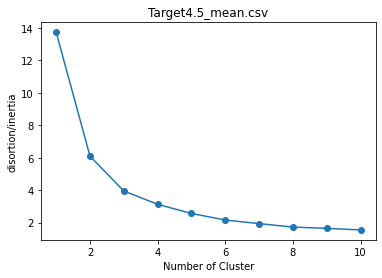

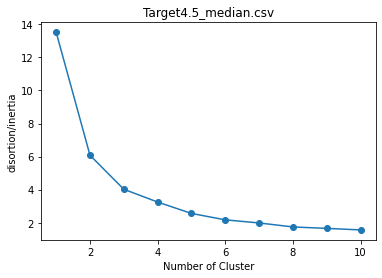

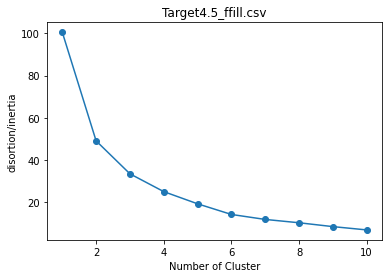

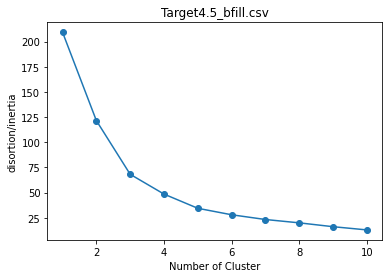

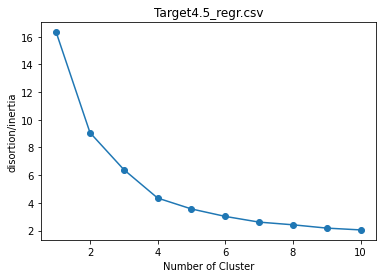

In [23]:
from sklearn.cluster import KMeans;
import matplotlib.pyplot as plt;

%env OMP_NUM_THREADS = 1

for filename in ("Target4.5_mean.csv", "Target4.5_median.csv", "Target4.5_ffill.csv", "Target4.5_bfill.csv", "Target4.5_regr.csv"):
  df = pd.read_csv(filename);
  #remove the country code and income group columns before doing elbow
  df = df.iloc[:, :-1];
  df = df.iloc[:, 1:];
  #print(df);

  inertia = [];
  cluster_range = range(1, 11);

  for num_cluster in cluster_range:
    km = KMeans(num_cluster);
    km.fit(df);
    inertia.append(km.inertia_);
  plt.xlabel("Number of Cluster");
  plt.ylabel("disortion/inertia");
  plt.title(filename);
  plt.plot(cluster_range, inertia);
  plt.scatter(cluster_range, inertia);
  plt.show();

Therefore, for the best number of clusters:

mean: 4

median: 5

ffill: 5

bfill: 5

regr: 4

In [24]:
#dictionary to store corresponding k values
K_values = {
    "Target4.5_mean.csv": 4,
    "Target4.5_median.csv": 5,
    "Target4.5_ffill.csv": 5,
    "Target4.5_bfill.csv": 5,
    "Target4.5_regr.csv": 4,
};

In [25]:
from sklearn import metrics;

for key, value in K_values.items():
  KMClustering = KMeans(n_clusters=value);
  df_km = pd.read_csv(key);
  km_data = df_km.copy().iloc[:, 1:-1];
  #print(km_data);
  km_target = df_km.copy().iloc[:, -1:];
  target = km_target["Income Group"].to_list();
  #print(target);
  KMClustering.fit(km_data);

  #evaluation without labels ----- Silhouette Coefficient
  print(
    key,
    ": Silhouette Coefficient for KMeans: %0.3f"
    % metrics.silhouette_score(km_data, KMClustering.labels_, metric='euclidean')
  );

  #evaluation with labels (country income group) ------ Adjusted Rand Index
  #print(KMClustering.labels_);
  print(
      key,
      ": Adjusted Rand Index for KMeans:",
      metrics.adjusted_rand_score(target, KMClustering.labels_)
  )

Target4.5_mean.csv : Silhouette Coefficient for KMeans: 0.306
Target4.5_mean.csv : Adjusted Rand Index for KMeans: 0.06982970211193909
Target4.5_median.csv : Silhouette Coefficient for KMeans: 0.415
Target4.5_median.csv : Adjusted Rand Index for KMeans: 0.07206760504007094
Target4.5_ffill.csv : Silhouette Coefficient for KMeans: 0.609
Target4.5_ffill.csv : Adjusted Rand Index for KMeans: 0.04833707967750326
Target4.5_bfill.csv : Silhouette Coefficient for KMeans: 0.701
Target4.5_bfill.csv : Adjusted Rand Index for KMeans: 0.12055565371058113
Target4.5_regr.csv : Silhouette Coefficient for KMeans: 0.534
Target4.5_regr.csv : Adjusted Rand Index for KMeans: 0.06312194098009294


Hierarchical Clustering

In [26]:
from sklearn.cluster import AgglomerativeClustering;

for key, value in K_values.items():
  df_hc = pd.read_csv(key);
  hc_data = df_hc.copy().iloc[:, 1:-1];
  hc_target = df_hc.copy().iloc[:, -1:];
  target = hc_target["Income Group"].to_list();

  for linkage in ( "average", "complete", "single"):
    HClustering = AgglomerativeClustering(linkage=linkage, n_clusters=value);
    HClustering.fit(hc_data);

    #evaluation without labels ----- Silhouette Coefficient
    print(
      key,
      ": Silhouette Coefficient for Hierarchical Clustering - ",
      linkage,
      " : %0.3f"
      % metrics.silhouette_score(hc_data, HClustering.labels_, metric='euclidean')
    );

    #evaluation with labels (country income group) ------ Adjusted Rand Index
    print(
      key,
      ": Adjusted Rand Index for Hierachical Clustering - ",
      linkage,
      " : ",
      metrics.adjusted_rand_score(target, KMClustering.labels_)
    );

Target4.5_mean.csv : Silhouette Coefficient for Hierarchical Clustering -  average  : 0.669
Target4.5_mean.csv : Adjusted Rand Index for Hierachical Clustering -  average  :  0.06312194098009294
Target4.5_mean.csv : Silhouette Coefficient for Hierarchical Clustering -  complete  : 0.513
Target4.5_mean.csv : Adjusted Rand Index for Hierachical Clustering -  complete  :  0.06312194098009294
Target4.5_mean.csv : Silhouette Coefficient for Hierarchical Clustering -  single  : 0.357
Target4.5_mean.csv : Adjusted Rand Index for Hierachical Clustering -  single  :  0.06312194098009294
Target4.5_median.csv : Silhouette Coefficient for Hierarchical Clustering -  average  : 0.548
Target4.5_median.csv : Adjusted Rand Index for Hierachical Clustering -  average  :  0.06312194098009294
Target4.5_median.csv : Silhouette Coefficient for Hierarchical Clustering -  complete  : 0.408
Target4.5_median.csv : Adjusted Rand Index for Hierachical Clustering -  complete  :  0.06312194098009294
Target4.5_media

As we can learn from the performance metrics above, in terms of the performance of using Hierarchical Clustering, the best linkage for each of the imputation method are :

Imputation Method:

Mean: average ------ Silhouette Coefficient: 0.669

Median: average ------ Silhouette Coefficient: 0.548

Ffill: single ------ Silhouette Coefficient: 0.813

Bfill: complete ------ Silhouette Coefficient: 0.641

Regression: single ------ Silhouette Coefficient: 0.733

Birch Clustering

In [27]:
from sklearn.cluster import Birch;

for key, value in K_values.items():
  df_bir = pd.read_csv(key);
  bir_data = df_bir.copy().iloc[:, 1:-1];
  bir_target = df_bir.copy().iloc[:, -1:];
  target = bir_target["Income Group"].to_list();

  BClustering = Birch(n_clusters=value);
  BClustering.fit(bir_data);

  #evaluation without labels ----- Silhouette Coefficient
  print(
    key,
    ": Silhouette Coefficient for Birch: %0.3f"
    % metrics.silhouette_score(bir_data, BClustering.predict(bir_data), metric='euclidean')
  );

  #evaluation with labels (country income group) ------ Adjusted Rand Index
  print(
      key,
      ": Adjusted Rand Index for Birch:",
      metrics.adjusted_rand_score(target, BClustering.predict(bir_data))
  );

Target4.5_mean.csv : Silhouette Coefficient for Birch: 0.723
Target4.5_mean.csv : Adjusted Rand Index for Birch: 0.02474167742714914
Target4.5_median.csv : Silhouette Coefficient for Birch: 0.715
Target4.5_median.csv : Adjusted Rand Index for Birch: 0.02474167742714914
Target4.5_ffill.csv : Silhouette Coefficient for Birch: 0.779
Target4.5_ffill.csv : Adjusted Rand Index for Birch: -0.0011250201025410783
Target4.5_bfill.csv : Silhouette Coefficient for Birch: 0.633
Target4.5_bfill.csv : Adjusted Rand Index for Birch: 0.09981211919950057
Target4.5_regr.csv : Silhouette Coefficient for Birch: 0.678
Target4.5_regr.csv : Adjusted Rand Index for Birch: 0.028821616280055366


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_birch.py:721: ConvergenceWarning: Number of subclusters found (2) by BIRCH is less than (4). Decrease the threshold.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_birch.py:721: ConvergenceWarning: Number of subclusters found (2) by BIRCH is less than (5). Decrease the threshold.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_birch.py:721: ConvergenceWarning: Number of subclusters found (2) by BIRCH is less than (4). Decrease the threshold.
  ConvergenceWarning,


Because the bigger Silhouette Coefficient is, the better the clustering model is, and so does the Adjusted Rand Index, the closer it is to 1, the better the clustering model is.

Therefore, according to the calculation above, we can learn that the best clustering methods for each of the imputation method are:

Mean: Birch Clustering ------ Silhouette Coefficient: 0.723

Median: Birch Clustering ------ Silhouette Coefficient: 0.715

Ffill: Hierarchical Clustering ----- single linkage ----- Silhouette Coefficient: 0.813

Bfill: KMeans Clustering ------ Silhouette Coefficient: 0.701

Regression: Hierarchical Clustering ----- single linkage ---- Silhouette Coefficient: 0.733

Because, 0.813 > 0.733 > 0.723 > 0.715 > 0.701, the best imputation method for clustering is Forward fill using Hierarchical Clustering with complete linkage.